In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
import pykitti
import PIL
import matplotlib.pyplot as plt
import os

import numpy as np


basedir = 'dataset'
print(os.listdir(basedir))
sequence = '01'

['sequences', 'poses']


In [3]:
dataset = pykitti.odometry(basedir, sequence, frames=range(0, 20, 5))

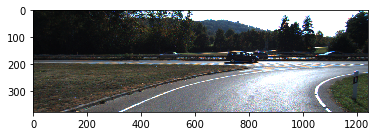

In [4]:
plt.imshow(dataset.get_cam2(0))

(50, 150, 3)


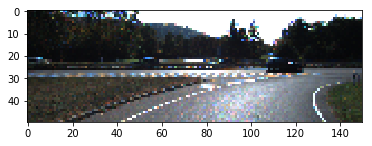

In [5]:
image_pil = dataset.get_cam2(1)
image_pil = image_pil.resize(size=(150,50))
image = np.array(image_pil)
print(image.shape)
plt.imshow(image)

In [6]:
dataset = pykitti.odometry(basedir, sequence)
len(dataset.cam2_files)

1101

In [7]:
from deep_visual_odometry.kitti_utils import KITTIdata
kitti_data = KITTIdata(basedir, sequences = ['00','01'], img_size=(150,50))
print(kitti_data.dataset_len)

{'00': 4541, '01': 1101}


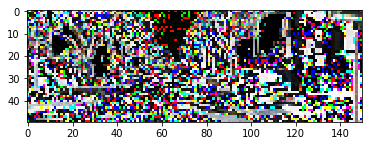

In [8]:
series, _, _ = kitti_data.get_series(sequence_len = 10)
plt.imshow(series[0,:,:,3:6])

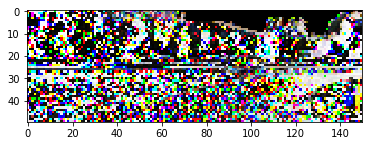

In [9]:
series, _, _ = kitti_data.get_series(sequence_len = 10)
plt.imshow(series[0,:,:,3:6])

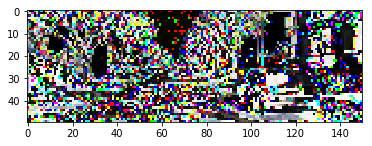

In [10]:
series, _, _ = kitti_data.get_series(sequence_len = 10)
plt.imshow(series[0,:,:,3:6])

As can be seen above the series alternates between sequences, if only sequences need to be used then provide them as arguments while calling get_series().

In [11]:
series_inputs, velocities, poses = kitti_data.get_series(sequence_len=100)

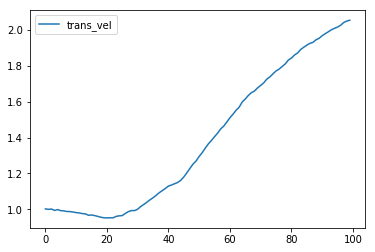

In [12]:
plt.plot(velocities[:,0],label = 'trans_vel')
plt.legend()

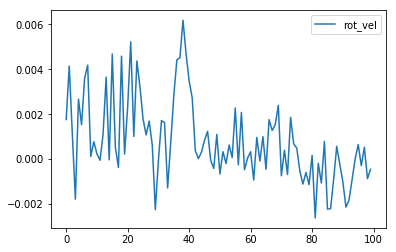

In [13]:
plt.plot(velocities[:,1],label = 'rot_vel')
plt.legend()

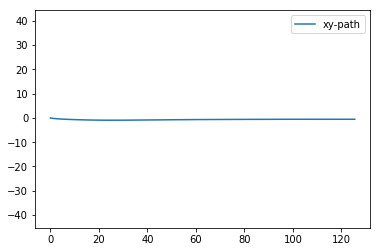

In [14]:
plt.plot(poses[:,0], poses[:,1], label = 'xy-path')
plt.axis('equal')
plt.legend()

In [15]:
kitti_data.get_series_batch(batch_size=10)

(array([[[[[ 50,  45,  24,  38,  23,   7],
           [ 37,  41,  29, 255, 252, 252],
           [ 17,  20,  20, 208, 223, 239],
           ...,
           [ 36,  40,  36,   0, 254, 253],
           [ 36,  40,  42,   0,   2,   3],
           [ 38,  39,  42,   5, 254,   2]],
 
          [[ 23,  30,  19, 214, 227, 249],
           [ 22,  27,  22,   0, 255, 250],
           [ 26,  29,  18, 237, 235, 241],
           ...,
           [ 37,  42,  40,   0,   3,   1],
           [ 37,  37,  43,   0,   0,   5],
           [ 36,  42,  41,   2,   2,   4]],
 
          [[ 21,  24,  18, 243, 239, 243],
           [ 30,  27,  22, 180, 198, 223],
           [ 36,  37,  27,  17,  16,   7],
           ...,
           [ 39,  41,  40,   1,   4,   2],
           [ 34,  41,  38,   2,   3,   1],
           [ 38,  38,  38,   4, 255,   2]],
 
          ...,
 
          [[130, 133, 128, 222, 240, 240],
           [123, 133, 123, 223, 238, 242],
           [150, 145, 130,  12, 251, 249],
           ...,
       